In [5]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
from sklearn.linear_model import LinearRegression
import math
from scipy.optimize import curve_fit

In [6]:
loaded_node_temp= pd.read_pickle(Dict_temp_1_5)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_1_5)

#df.head()

NameError: name 'Dict_temp_1_5' is not defined

In [ ]:
#loaded_node_temp.keys()

In [ ]:
temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 3:  # Make sure the list has at least 2 elements
        temperature .append(loaded_node_temp[key][2])

print(temperature )


[25.0001, 25.0001, 25.0002, 25.0004, 25.0005, 25.0007, 25.0009, 25.0011, 25.0013, 25.0016, 25.0018, 25.0021, 25.0024, 25.0028, 25.0031, 25.0035, 25.0038, 25.0043, 25.0047, 25.0051, 25.0056, 25.0061, 25.0066, 25.0071, 25.0076, 25.0082, 25.0087, 25.0093, 25.0099, 25.0106, 25.0113, 25.0121, 25.013, 25.0139, 25.0149, 25.0159, 25.017, 25.0181, 25.0193, 25.0205, 25.0218, 25.0231, 25.0245, 25.0259, 25.0274, 25.0289, 25.0305, 25.0321, 25.0338, 25.0356, 25.0373, 25.0392, 25.0411, 25.043, 25.045, 25.047, 25.0491, 25.0512, 25.0534, 25.0556, 25.058, 25.0604, 25.0628, 25.0653, 25.0679, 25.0706, 25.0733, 25.076, 25.0789, 25.0818, 25.0847, 25.0877, 25.0908, 25.094, 25.0972, 25.1004, 25.1038, 25.1072, 25.1106, 25.1141, 25.1177, 25.1213, 25.125, 25.1288, 25.1326, 25.1365, 25.1405, 25.1445, 25.1486, 25.1527, 25.1569, 25.1611, 25.1654, 25.1697, 25.174, 25.1785, 25.1829, 25.1874, 25.192, 25.1966, 25.2013, 25.206, 25.2107, 25.2156, 25.2204, 25.2253, 25.2303, 25.2353, 25.2404, 25.2455, 25.2507, 25.2559, 25.

In [ ]:
time= loaded_node_temp.keys()
time = np.array(list(time), dtype=float)

In [ ]:
time

array([2.000e-02, 4.000e-02, 6.000e-02, ..., 5.996e+01, 5.998e+01,
       6.000e+01])

Fitted 'a' coefficient: 24.995029112712977
Fitted 'b' coefficient: 0.1521201192343109


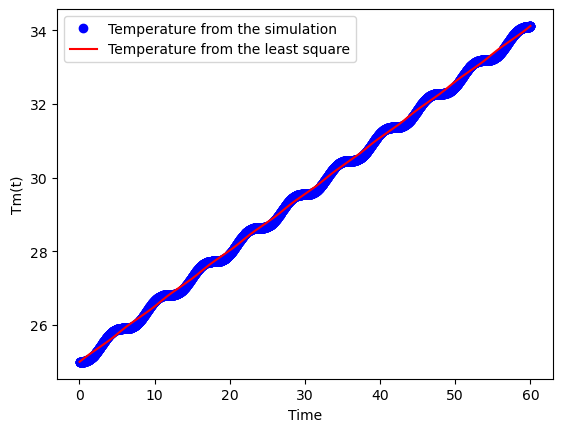

In [ ]:
# Define the function Tm(t) = a + bt + ∑∆Tn cos(nωt + ϕn) for n = 1, 3, 5, 7
def tm_function(t, a, b, *params):
    result = a + b * t
    num_terms = len(params) // 2  # Since each term has both ∆Tn and ϕn
    for n in range(1, num_terms + 1):
        delta_Tn = params[2*n - 2]
        phi_n = params[2*n - 1]
        result += delta_Tn * np.cos(n * omega * t + phi_n)
        
    return result


time= np.array(time)

# Initial guess for parameters
initial_guess = [1.0, 1.0] + [0.0, 0.0, 0.0, 0.0]  # [a, b, ∆T1, ϕ1, ∆T3, ϕ3, ∆T5, ϕ5, ∆T7, ϕ7]

# Angular frequency
omega = 2 * np.pi*0.182

# Perform the curve fitting
popt, _ = curve_fit(tm_function, time, temperature, p0=initial_guess)


a_fit = popt[0]
b_fit = popt[1]

print("Fitted 'a' coefficient:", a_fit)
print("Fitted 'b' coefficient:", b_fit)

# Generate fitted curve using the fitted coefficients
fitted_curve = tm_function(time, *popt)


plt.plot(time, temperature, 'bo', label='Temperature from the simulation')
plt.plot(time, fitted_curve, 'r-', label='Temperature from the least square')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()


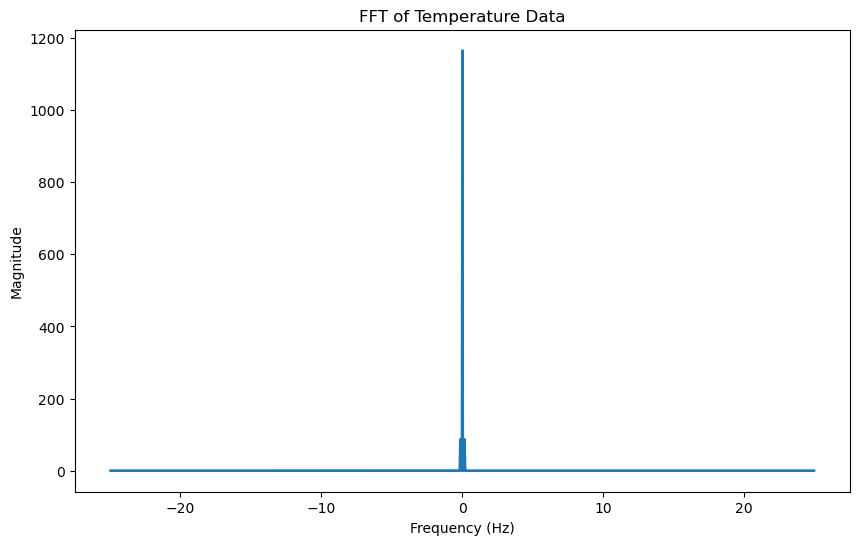

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt

# Assuming you have time series data as follows:
# t = np.array([...])  # Your time points
# temperature = np.array([...])  # Your temperature data points

# You would typically subtract the mean of the data to remove the DC component
temperature_detrended = temperature - np.mean(temperature)
# Apply windowing function
window = np.blackman(len(temperature_detrended))
windowed_signal = temperature_detrended * window

# Perform the FFT on windowed signal
fft_result = np.fft.fft(windowed_signal)

frequencies = np.fft.fftfreq(len(time), np.mean(np.diff(time)))  # Assuming uniform spacing in time points

# Plot the magnitude spectrum
plt.figure(figsize=(10,6))
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Temperature Data')
plt.show()

In [ ]:
# Assuming that the time array is already defined as 'time'
for i in range(1, len(fft_result)//2):  # //2 because the second half is the conjugate of the first half
    freq = frequencies[i]
    magnitude = np.abs(fft_result[i])
    phase = np.angle(fft_result[i])
    
    # Constructing the sine wave component
    sine_wave = magnitude * np.sin(2 * np.pi * freq * time + phase)
    
    plt.figure(figsize=(10,6))
    plt.plot(time, sine_wave)
    plt.title(f'Sine wave for Frequency {freq:.2f} Hz')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
    break


NameError: name 'fft_result' is not defined

In [ ]:
np.mean(temperature)

NameError: name 'np' is not defined

In [ ]:
fft_result

array([-4.54747351e-12   +0.j        , -4.05279686e+00+4344.0431979j ,
       -4.06505001e+00+2172.01165564j, ...,
       -4.07480620e+00-1448.00589387j, -4.06505001e+00-2172.01165564j,
       -4.05279686e+00-4344.0431979j ])

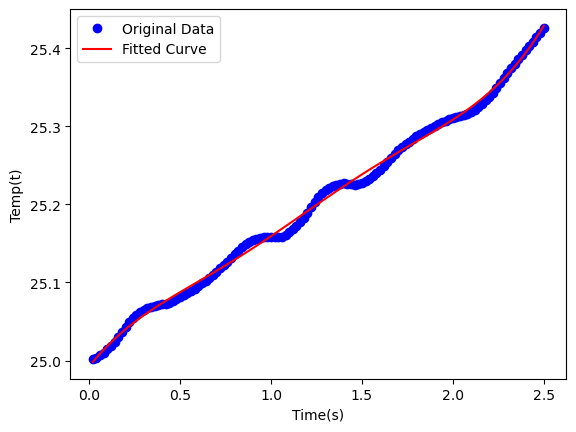

In [ ]:
new_node_temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 100:  
        new_node_temperature.append(loaded_node_temp[key][4])

plt.plot(time, new_node_temperature, 'bo', label='Original Data')
plt.plot(time,  fitted_curve, 'r-', label='Fitted Curve')
plt.xlabel('Time(s)')
plt.ylabel('Temp(t)')
plt.legend()
plt.show()

In [ ]:
Error= abs((temperature- fitted_curve)/temperature)

In [ ]:
np.mean(Error)*100

0.021118689225091705

In [ ]:
#0∘=∑𝑡sin(2𝜋𝜔𝑡+3𝜋2)∗𝑇(𝑡),
(1)
#90∘=∑𝑡cos(2𝜋𝜔𝑡+3𝜋2)∗𝑇(𝑡).
# https://www.mdpi.com/2076-3417/13/7/4094
#https://www.sciencedirect.com/science/article/abs/pii/S0026271410003550

1

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the thermal image (This should be the path to your thermal image)
#image_path = 'path_to_your_thermal_image.png'
#image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as a grayscale image

# If you have a series of images, you might load them in a loop and store them in a list

# Process the image (simplified example)
# Here, we'll just normalize the image to highlight the phase information, 
# but in real applications, more complex processing would be needed
#normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Visualize the original and processed image
#plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
#plt.subplot(122), plt.imshow(normalized_image, cmap='gray'), plt.title('Processed Image')
#plt.show()

In [ ]:
k = 149    # W/m·K, Thermal conductivity
n=10
lamda = np.sqrt(4*np.pi*k/n)
A= 


Known T1: 5.00°C
Numerically determined T1: -0.01°C


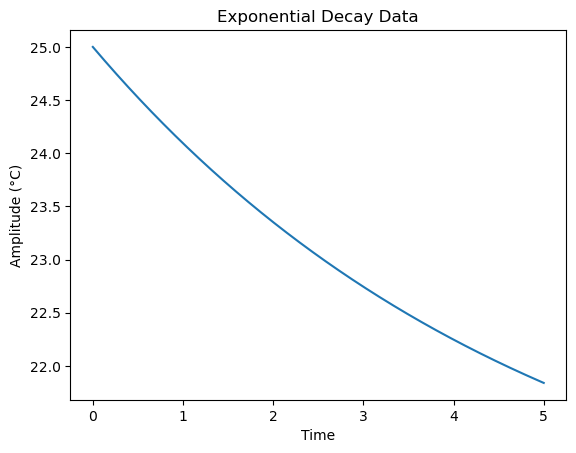

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Known value of T1
T1_true = 5

# Sample data with known T1
t = np.linspace(0, 5, 1000)  # Time vector over a suitable range
Ts = 20 + 5 * np.exp(-t / T1_true)  # Exponential decay with T1_true

# Compute FFT
Ts_fft = np.fft.fft(Ts)
frequencies = np.fft.fftfreq(len(Ts), d=t[1]-t[0])

# Find the index of the frequency closest to 1 Hz (with a tolerance)
tolerance = 0.01  # Define a tolerance for frequency matching
matching_indices = np.where(np.isclose(frequencies, 1, rtol=tolerance))[0]

if len(matching_indices) > 0:
    primary_frequency_index = matching_indices[0]
    amplitude_at_primary_frequency = np.abs(Ts_fft[primary_frequency_index])
else:
    print("No frequency close to 1 Hz found.")

# Numerically determined T1 with correct calculation
T1_numerical = -t[primary_frequency_index] / (np.log(amplitude_at_primary_frequency))

print(f"Known T1: {T1_true:.2f}°C")
print(f"Numerically determined T1: {T1_numerical:.2f}°C")

# For visualization
plt.plot(t, Ts)
plt.xlabel('Time')
plt.ylabel('Amplitude (°C)')
plt.title('Exponential Decay Data')
plt.show()


Numerically determined T1: 3.34°C


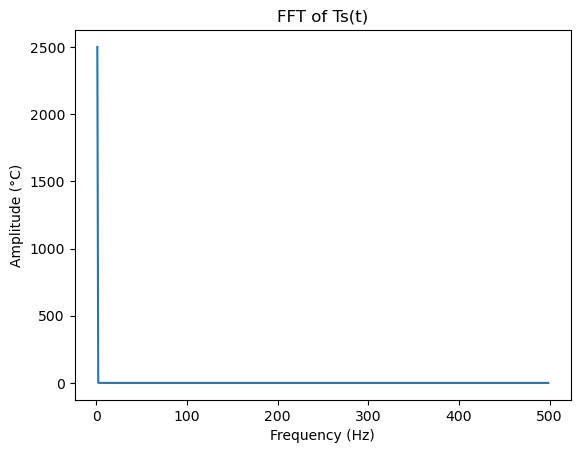

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
t = np.linspace(0, 1, 1000)  # Time vector
Ts = 20 + 5 * np.cos(2 * np.pi * t)  # Example temperature data

# Compute FFT
Ts_fft = np.fft.fft(Ts)
frequencies = np.fft.fftfreq(len(Ts), d=t[1]-t[0])

# Only consider the positive frequencies
Ts_fft = Ts_fft[frequencies > 0]
frequencies = frequencies[frequencies > 0]

# Calculate amplitudes
amplitudes = np.abs(Ts_fft)

# Determine T1: Double the amplitude of the primary frequency component
T1_numerical = 2 * amplitudes[1]  # Note the adjustment here

print(f"Numerically determined T1: {T1_numerical:.2f}°C")

# For visualization
plt.plot(frequencies, amplitudes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (°C)')
plt.title('FFT of Ts(t)')
plt.show()




Numerically determined T1: 5002.49°C


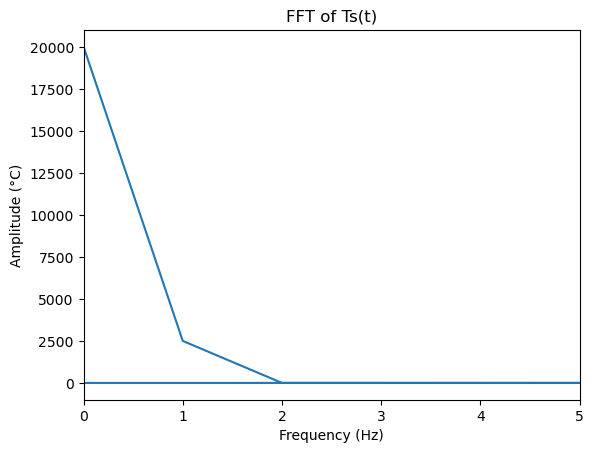

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
t = np.linspace(0, 1, 1000)  # Time vector over one period
Ts = 20 + 5 * np.cos(2 * np.pi * t)  # Example temperature data

# Compute FFT
Ts_fft = np.fft.fft(Ts)
frequencies = np.fft.fftfreq(len(Ts), d=t[1]-t[0])

# Find the index of the frequency closest to 1 Hz
closest_frequency_index = np.argmin(np.abs(frequencies - 1))

# Determine the amplitude corresponding to the primary frequency (1 Hz)
amplitude_at_primary_frequency = np.abs(Ts_fft[closest_frequency_index])

# Determine T1
T1_numerical = 2 * amplitude_at_primary_frequency

print(f"Numerically determined T1: {T1_numerical:.2f}°C")

# For visualization
plt.plot(frequencies, np.abs(Ts_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (°C)')
plt.title('FFT of Ts(t)')
plt.xlim([0, 5])  # Limiting to positive frequencies for clearer visualization
plt.show()


Known T1: 5.00°C
Numerically determined T1: -0.00°C


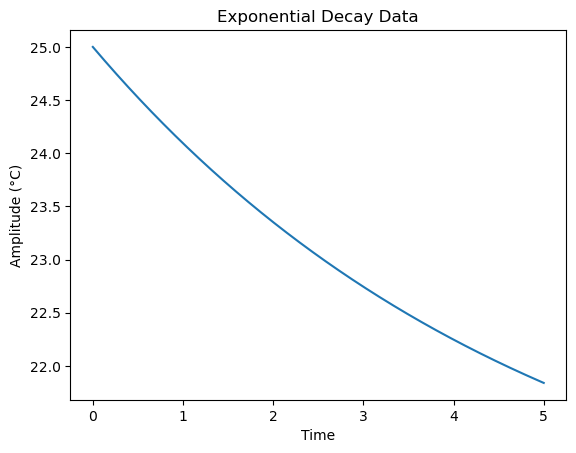

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Known value of T1
T1_true = 5

# Sample data with known T1
t = np.linspace(0, 5, 1000)  # Time vector over a suitable range
Ts = 20 + 5 * np.exp(-t / T1_true)  # Exponential decay with T1_true

# Compute FFT
Ts_fft = np.fft.fft(Ts)
frequencies = np.fft.fftfreq(len(Ts), d=t[1]-t[0])

# Find the index of the frequency closest to 0 Hz (DC component)
closest_frequency_index = np.argmin(np.abs(frequencies - 0))

# Determine the amplitude corresponding to the DC component
amplitude_at_dc = np.abs(Ts_fft[closest_frequency_index])

# Numerically determined T1
T1_numerical = -t[closest_frequency_index] / np.log(amplitude_at_dc / 5)

print(f"Known T1: {T1_true:.2f}°C")
print(f"Numerically determined T1: {T1_numerical:.2f}°C")

# For visualization
plt.plot(t, Ts)
plt.xlabel('Time')
plt.ylabel('Amplitude (°C)')
plt.title('Exponential Decay Data')
plt.show()


Known T1: 5.00°C
Numerically determined T1: -0.00°C


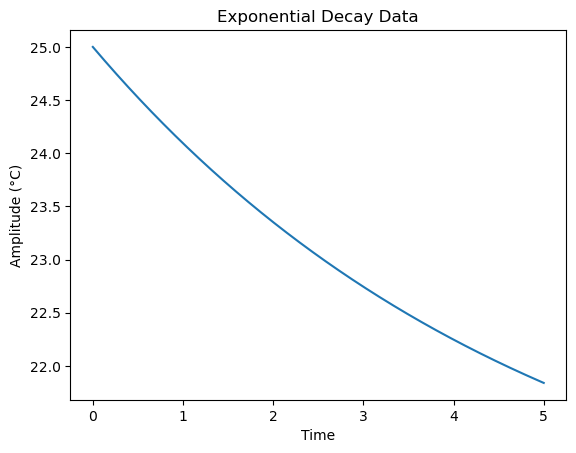

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Known value of T1
T1_true = 5

# Sample data with known T1
t = np.linspace(0, 5, 1000)  # Time vector over a suitable range
Ts = 20 + 5 * np.exp(-t / T1_true)  # Exponential decay with T1_true

# Compute FFT
Ts_fft = np.fft.fft(Ts)
frequencies = np.fft.fftfreq(len(Ts), d=t[1]-t[0])

# Find the index of the frequency closest to 0 Hz (DC component)
closest_frequency_index = np.argmin(np.abs(frequencies - 0))

# Determine the amplitude corresponding to the DC component
amplitude_at_dc = np.abs(Ts_fft[closest_frequency_index])

# Numerically determined T1 with correct calculation
T1_numerical = -t[closest_frequency_index] / np.log(amplitude_at_dc)

print(f"Known T1: {T1_true:.2f}°C")
print(f"Numerically determined T1: {T1_numerical:.2f}°C")

# For visualization
plt.plot(t, Ts)
plt.xlabel('Time')
plt.ylabel('Amplitude (°C)')
plt.title('Exponential Decay Data')
plt.show()


Known T1: 5.00°C
Numerically determined T1: -0.00°C


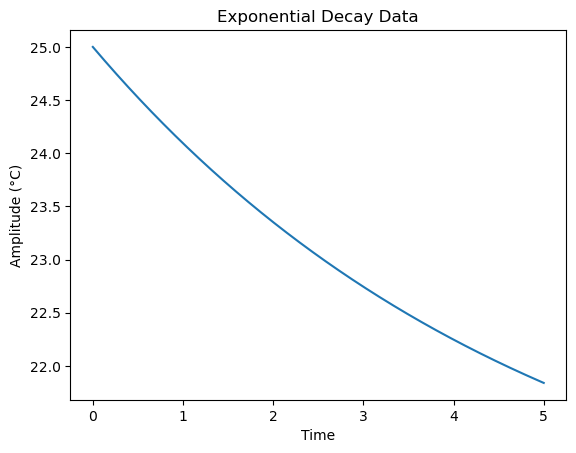

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Known value of T1
T1_true = 5

# Sample data with known T1
t = np.linspace(0, 5, 1000)  # Time vector over a suitable range
Ts = 20 + 5 * np.exp(-t / T1_true)  # Exponential decay with T1_true

# Compute FFT
Ts_fft = np.fft.fft(Ts)
frequencies = np.fft.fftfreq(len(Ts), d=t[1]-t[0])

# Find the index of the frequency closest to 0 Hz (DC component)
closest_frequency_index = np.argmin(np.abs(frequencies - 0))

# Determine the amplitude corresponding to the DC component
amplitude_at_dc = np.abs(Ts_fft[closest_frequency_index])

# Numerically determined T1 with correct calculation
T1_numerical = -t[closest_frequency_index] / (np.log(amplitude_at_dc))

print(f"Known T1: {T1_true:.2f}°C")
print(f"Numerically determined T1: {T1_numerical:.2f}°C")

# For visualization
plt.plot(t, Ts)
plt.xlabel('Time')
plt.ylabel('Amplitude (°C)')
plt.title('Exponential Decay Data')
plt.show()
